In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lendo o data frame 
df = pd.read_csv('PremierLeagueSeason2024.csv')
df.head()

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,179,66,55,12,9,177,113,1
1,Liverpool,154,83,44,19,13,151,71,2
2,Arsenal,146,68,46,12,18,150,78,3
3,Manchester United,130,102,39,17,20,134,28,4
4,Chelsea,135,99,37,19,20,130,36,5


In [3]:
#Mostrando os dados nulos da tabela
df.isnull().sum()

team               0
goals_scored       0
goals_conceded     0
wins               0
draws              0
losses             0
points             0
goal_difference    0
rank               0
dtype: int64

In [4]:
df['team'].unique()

array(['Manchester City', 'Liverpool', 'Arsenal', 'Manchester United',
       'Chelsea', 'Tottenham Hotspur', 'Aston Villa', 'West Ham United',
       'Everton', 'Newcastle United', 'Crystal Palace',
       'Wolverhampton Wanderers', 'Brighton and Hove Albion', 'Fulham',
       'Leicester City', 'Burnley', 'Leeds United', 'Bournemouth',
       'Southampton', 'Brentford', 'Sheffield United',
       'Nottingham Forest', 'Luton Town', 'West Bromwich Albion'],
      dtype=object)

In [5]:
df['Numero de Jogos'] = df['draws'] + df['losses'] + df['wins']

In [6]:
#Mostrando os times com menos de 50% de vitorias e mais de 50% de derrotas
def low_valor_red(value):
    color = 'red' if value < 38 else 'white' 
    return f'color: {color}'

def low_valor_blue(value):
    color = 'blue' if value > 38 else 'white'
    return f'color: {color}'

df_vitorias_derrtotas= (
    df.style
    .applymap(low_valor_red, subset=['wins'])
    .applymap(low_valor_blue, subset=['losses'])
)

df_vitorias_derrtotas

C:\Users\Lucas\AppData\Local\Temp\ipykernel_9848\3919353321.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(low_valor_red, subset=['wins'])
C:\Users\Lucas\AppData\Local\Temp\ipykernel_9848\3919353321.py:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(low_valor_blue, subset=['losses'])


,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank,Numero de Jogos
0,Manchester City,179,66,55,12,9,177,113,1,76
1,Liverpool,154,83,44,19,13,151,71,2,76
2,Arsenal,146,68,46,12,18,150,78,3,76
3,Manchester United,130,102,39,17,20,134,28,4,76
4,Chelsea,135,99,37,19,20,130,36,5,76
5,Tottenham Hotspur,142,106,38,14,24,128,36,6,76
6,Aston Villa,131,107,36,15,25,123,24,7,76
7,West Ham United,122,121,33,18,25,117,1,8,76
8,Everton,87,99,30,17,29,107,-12,9,76
9,Newcastle United,131,124,30,15,31,105,7,10,76


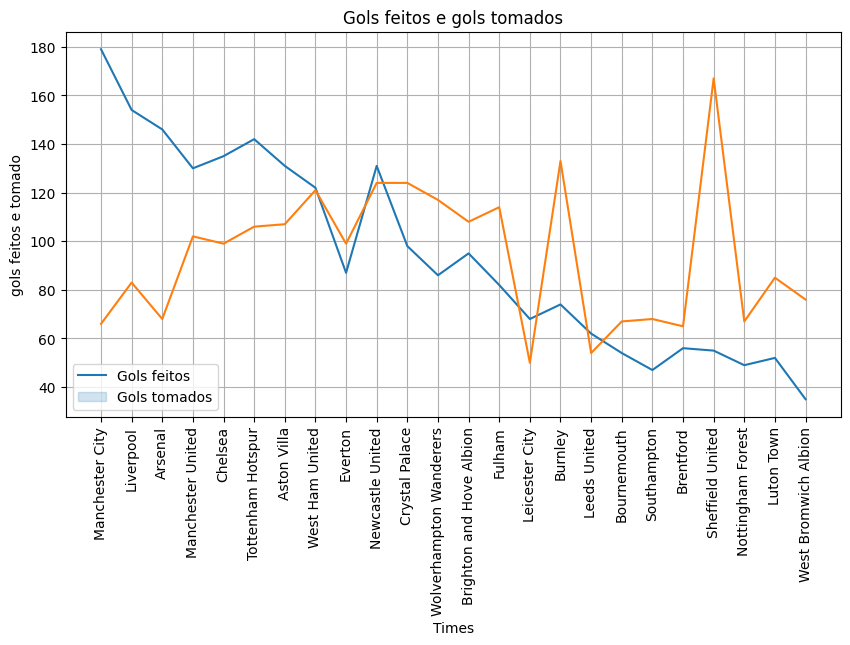

In [7]:
#Grafico em relação de gols feitos e gols tomados
plt.figure(figsize=(10,5))
sns.lineplot(x= 'team', y='goals_scored', markers='o', data= df)
sns.lineplot(x= 'team', y='goals_conceded', markers= 'o', data= df)
plt.title('Gols feitos e gols tomados')
plt.xlabel('Times')
plt.ylabel('gols feitos e tomado')
plt.legend(['Gols feitos','Gols tomados'])
plt.grid(True)
plt.xticks(rotation=90);


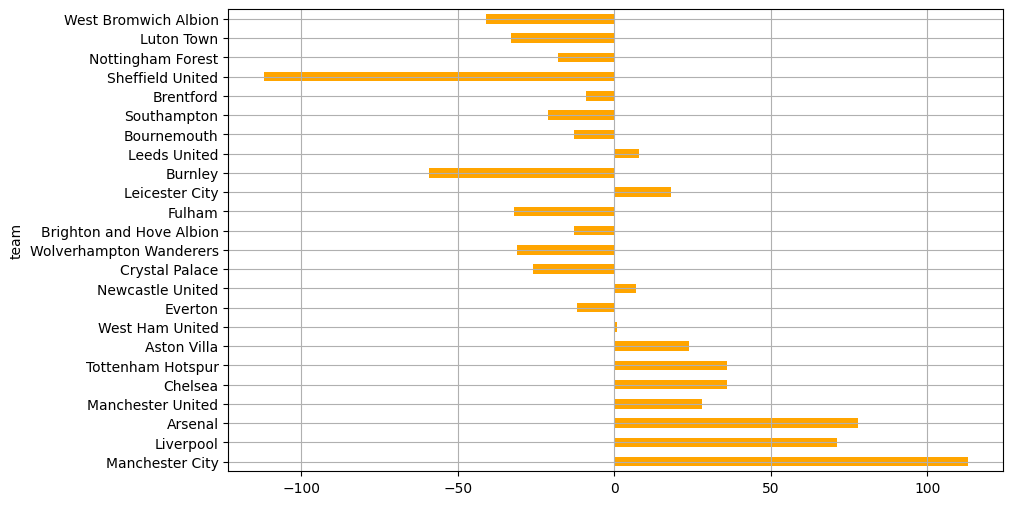

In [8]:
#Mostrando o saldo de gol visualmente
plt.figure(figsize= (10,6))
df.set_index('team')['goal_difference'].plot(kind='barh', color='orange', figsize=(10, 6))
plt.grid(True)



In [9]:
#selecionalndo o top 5
top5= df.iloc[0:5]
top5

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank,Numero de Jogos
0,Manchester City,179,66,55,12,9,177,113,1,76
1,Liverpool,154,83,44,19,13,151,71,2,76
2,Arsenal,146,68,46,12,18,150,78,3,76
3,Manchester United,130,102,39,17,20,134,28,4,76
4,Chelsea,135,99,37,19,20,130,36,5,76


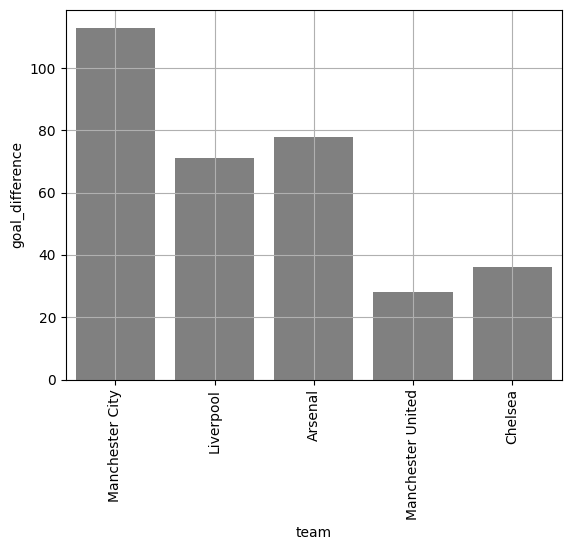

In [10]:
#Saldo de gols do top 5
sns.barplot(data=top5, y= 'goal_difference', x= 'team', color= 'gray', )
plt.grid(True)
plt.xticks(rotation=90);

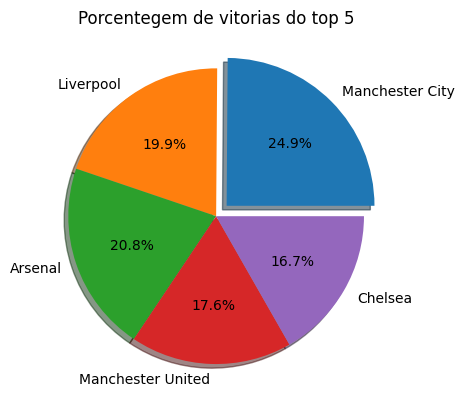

In [11]:
#criando grafico do tipo torta para mostrar a win rate do top 5
plt.pie(top5['wins'], labels = top5['team'], explode=(0.1,0,0,0,0), shadow= True, autopct= '%1.1f%%')
plt.title('Porcentegem de vitorias do top 5');